# SI 618: Data Manipulation and Analysis
## 04 - Visualization & Univariate Statistics

### Dr. Chris Teplovs, School of Information, University of Michigan
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a> This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

Version 2021.02.14.1.CT

## Overview of today 

- Comments/Questions/Concerns
- Review last week: Aggregation & Grouping
- Today: Univariate Statistics  & Visualization

## A quick note about Markdown cells
We have encouraged you to use Markdown cells to add text to your notebooks.  Please see 
https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html for a more complete explanation of the use of Markdown in Jupyter.  You can also examine any of the existing Markdown blocks by clicking on them.

### IMPORTANT: Replace ```?``` in the following code with your uniqname.

In [1]:
MY_UNIQNAME = 'cteplovs'

In [2]:
import pandas as pd
import numpy as np

## Aggregation and Grouping (review)

### Group By

In [3]:
from io import StringIO

TESTDATA=StringIO("""State,Retailer,Fruit,Sales
MI,Walmart,Apple,100
MI,Wholefoods,Apple,150
MI,Kroger,Orange,180
CA,Walmart,Apple,220
CA,Wholefoods,Apple,180
CA,Safeway,Apple,220
CA,Safeway,Orange,110
NY,Walmart,Apple,90
NY,Walmart,Orange,80
NY,Wholefoods,Orange,120
""")

fruit = pd.read_csv(TESTDATA, index_col=None)

In [4]:
fruit.head()

,State,Retailer,Fruit,Sales
0,MI,Walmart,Apple,100
1,MI,Wholefoods,Apple,150
2,MI,Kroger,Orange,180
3,CA,Walmart,Apple,220
4,CA,Wholefoods,Apple,180


#### (a) What is the total sales for each state?
This requires us to group by state, and aggregate sales by taking the sum.

The easiest way of doing this if to use `groupby`

If you execute groupby on the dataframe what you'll get back is an object called DataFrameGroupBy

In [5]:
fruit.groupby('State')

On its own it's a bit useless... it just keeps track of which rows should go into each "pile" (where pile here means a unique group for each state)

If we ask this object to describe itself, you can see what is inside notice that it threw away all the other columns because they were not numerical.  Only "Sales" which is a number, was kept

In [6]:
fruit.groupby('State').describe()

Sales                                                          
      count        mean        std    min    25%    50%    75%    max
State                                                                
CA      4.0  182.500000  51.881275  110.0  162.5  200.0  220.0  220.0
MI      3.0  143.333333  40.414519  100.0  125.0  150.0  165.0  180.0
NY      3.0   96.666667  20.816660   80.0   85.0   90.0  105.0  120.0

In [7]:
# What are the total sales for each state?
fruit.groupby('State').sum()  # instead of size()

,Sales
State,
CA,730
MI,430
NY,290


What just happend? A couple of things:
- `groupby()` got first executed on `df`, returning an `DataFrameGroupBy` object. This object itself is useless unless coupled with an aggregation function, such as `sum()`, `mean()`, `max()`, `apply()`.
- Then, `sum()` got executed on the `DataFrameGroupBy` object, generating the `DataFrame` object you see above. Notice how the table looks different than the original DataFrame `df`? Here are the differences:
  - The `State` column now becomes the index of the DataFrame. The string "State" is the name of the index. Notice how the index name is displayed on a lower level than column names.
  - Since we performed a `groupby` operation by `State`, so only the unique values of `State` are kept as index.
  - Among the other columns, Retailer, Fruit, and Sales, only Sales is kept in the result table. This is because the aggregation function `sum()` only knows how to aggregate numerical values. And only Sales is a numerical column. The other columns are hence dropped.

#### (b) What is the total sales for each state for each fruit?
This requires us to perform `groupby` on two columns. So, we provide a list of column names to the `groupby` function.

Don't forget that an aggregation function needs to follow the `groupby` function in order to generate results.

In [8]:
# What is the total sales for each state for each fruit?
fruit.groupby(['State','Fruit']).sum()

Sales
State Fruit        
CA    Apple     620
      Orange    110
MI    Apple     250
      Orange    180
NY    Apple      90
      Orange    200

How is this DataFrame different from the previous one?

The biggest different is that this DataFrame has what is called a `MultiIndex` (or hierarchical index), as opposed to a simple index. In this table, the left two "columns" are not columns but actually part of the `MultiIndex`, and the `Sales` is the single real "column" in the DataFrame. (Running out of terminologies here...)

The hierarchical index can be organized in an alternative way if we swapped the order of State and Fruit.

In [9]:
fruit.groupby(['Fruit','State']).sum()

Sales
Fruit  State       
Apple  CA       620
       MI       250
       NY        90
Orange CA       110
       MI       180
       NY       200

#### (c) Which state has the maximum total sales?
This question is not asking about the maximum value, but rather which state holds that maximum. There are multiple ways to do it. A principled way is to use `idxmax`.

In [10]:
# Which state has the maximum total sales?
fruitSalesByState = fruit.groupby('State').sum()
print(fruitSalesByState)
max_state = fruitSalesByState['Sales'].idxmax()
print("The state with the maximum sales is: ",max_state)

       Sales
State       
CA       730
MI       430
NY       290
The state with the maximum sales is:  CA


What if we wanted to get the sales value of CA again?

In [11]:
fruitSalesByState['Sales'][max_state]

730

#### (d) Which state has the maximum total sales for apples?</font>

In [12]:
# Which state has the maximum total sales for apples?
# give me apple sellers
apples = fruit[fruit.Fruit == 'Apple']
apples

,State,Retailer,Fruit,Sales
0,MI,Walmart,Apple,100
1,MI,Wholefoods,Apple,150
3,CA,Walmart,Apple,220
4,CA,Wholefoods,Apple,180
5,CA,Safeway,Apple,220
7,NY,Walmart,Apple,90


In [13]:
# aggr. by state
applesByState = apples.groupby('State').sum()
applesByState

,Sales
State,
CA,620
MI,250
NY,90


In [14]:
applesByState.Sales

State
CA    620
MI    250
NY     90
Name: Sales, dtype: int64

In [15]:
applesByState.Sales.idxmax()

'CA'

In [16]:
applesByState.loc[applesByState.Sales.idxmax()]

Sales    620
Name: CA, dtype: int64

In the above command, `.loc[]` looks up the index label and returns that row.



## Visualization and Univariate Statistics

Think about plotting the relationship between X and Y for the following data:
![](https://github.com/umsi-data-science/si618-student/raw/main/assets/AnscombeData.png)
(https://en.wikipedia.org/wiki/Anscombe's_quartet)

A nice linear relationship, right?
![](https://github.com/umsi-data-science/si618-student/raw/main/assets/AnscombeQ1.png)
(https://en.wikipedia.org/wiki/Anscombe's_quartet)

# Anscombe's Quartet
![](https://github.com/umsi-data-science/si618-student/raw/main/assets/AnscombePlot.png)
(https://en.wikipedia.org/wiki/Anscombe's_quartet)

## Matplotlib, the basis for visualization in python

Matplotlib home page: https://matplotlib.org/index.html

Gallery: https://matplotlib.org/gallery/index.html

Sample plots: https://matplotlib.org/tutorials/introductory/sample_plots.html

https://matplotlib.org/users/pyplot_tutorial.html

matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

## matplotlib.pyplot

* collection of functions that make matplotlib work like MATLAB (is that helpful???)
* each function makes some change to a figure:
  * create a figure
  * create a plotting area in a figure
  * plots some lines in a plotting area
  * decorates the plot with labels, etc.
* states are preserved across function calls

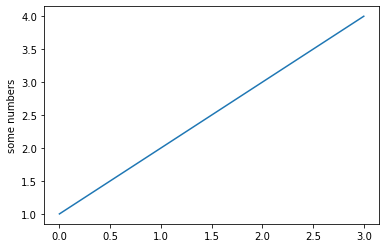

In [17]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

Hey, where's our figure?

In [18]:
%matplotlib inline

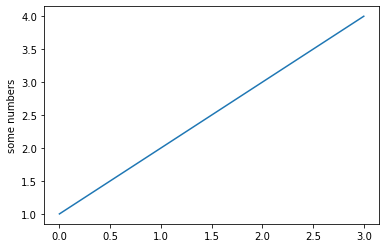

In [19]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

### <font color="magenta">Q1: Where did the numbers on the x-axis come from?</font>

Insert your answer here

To specify x- and y-values:

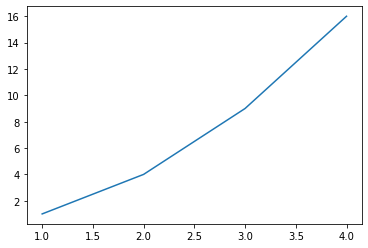

In [20]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

In [21]:
%matplotlib inline

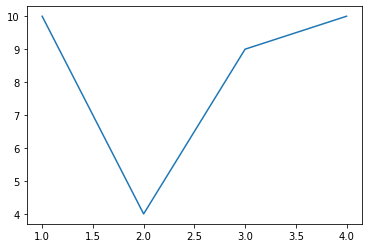

In [22]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [10,4,9,10])
#plt.axis([0, 6, 1, 20])
plt.show()

Note default shape is "b-", which means a blue line

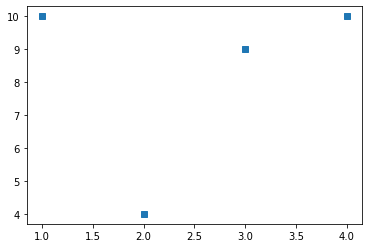

In [23]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [10,4,9,10], 's')
#plt.axis([0, 6, 0, 20])
plt.show()

We can explicitly set the bounds for the axes:

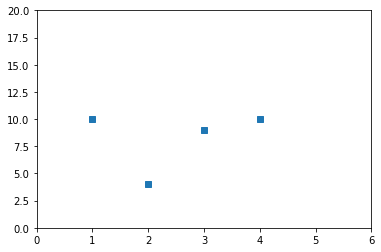

In [24]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [10,4,9,10], 's')
plt.axis([0, 6, 0, 20])
plt.show()

Let's generate some data to play with:

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0., 5.1, 0.2)
t

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ])

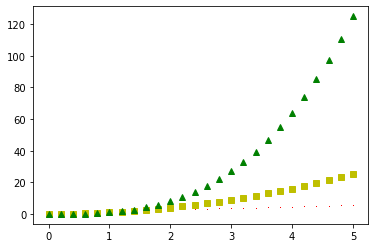

In [26]:
# red dashes, blue squares and green triangles
plt.plot(t, t, 'r,', t, t**2, 'ys', t, t**3, 'g^')
plt.show()

In [27]:

markers = {'.': 'point', ',': 'pixel', 'o': 'circle', 
    'v': 'triangle_down', '^': 'triangle_up', '<': 'triangle_left', '>': 'triangle_right', 
    '1': 'tri_down', '2': 'tri_up', '3': 'tri_left', '4': 'tri_right', '8': 'octagon', 
    's': 'square', 'p': 'pentagon', '*': 'star', 'h': 'hexagon1', 'H': 'hexagon2', '+': 'plus',
    'x': 'x', 'D': 'diamond', 'd': 'thin_diamond', '|': 'vline', '_': 'hline', 
    'P': 'plus_filled', 'X': 'x_filled', 0: 
    'tickleft', 1: 'tickright', 2: 'tickup', 3: 'tickdown', 
    4: 'caretleft', 5: 'caretright', 6: 'caretup', 7: 'caretdown', 
    8: 'caretleftbase', 9: 'caretrightbase', 10: 'caretupbase', 11: 'caretdownbase', 
    'None': 'nothing', None: 'nothing', ' ': 'nothing', '': 'nothing'}


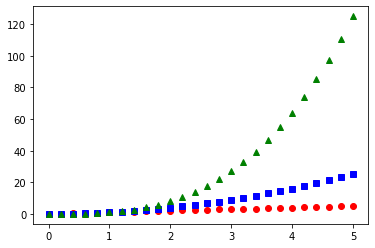

In [28]:
plt.plot(t, t, 'ro', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

https://matplotlib.org/3.0.3/api/markers_api.html#module-matplotlib.markers

https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D

### <font color="magenta">Q2: Try some other marker styles</font>

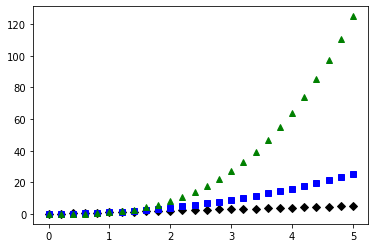

In [29]:
plt.plot(t, t, 'kD', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

## Setting line properties

In [30]:
x,y  = [1, 2, 3, 4], [1, 4, 9, 16]

In [31]:
x

[1, 2, 3, 4]

In [32]:
y

[1, 4, 9, 16]

Keyword args:

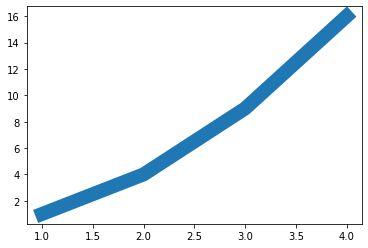

In [33]:
plt.plot(x, y, linewidth=14.0)

setter methods:

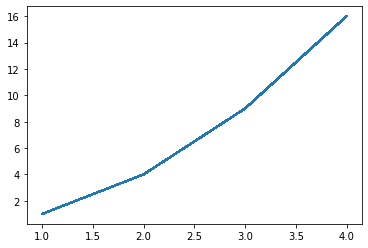

In [34]:
line, = plt.plot(x, y, '-')
line.set_antialiased(False)

```setp()```

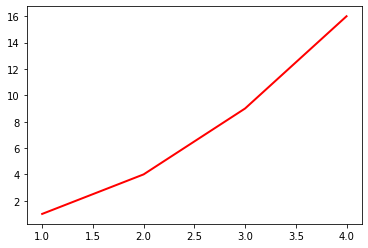

In [35]:
line = plt.plot(x,y)
# use keyword args
plt.setp(line, color='r', linewidth=2.0)
# or MATLAB style string value pairs
plt.setp(line, 'color', 'r', 'linewidth', 2.0)
plt.show()

## Multiple plots

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.1, 0.1)
t2 = np.arange(0.0, 5.02, 0.02)

In [37]:
t1

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

In [38]:
t2

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08,
       1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 ,
       1.32, 1.34, 1.36, 1.38, 1.4 , 1.42, 1.44, 1.46, 1.48, 1.5 , 1.52,
       1.54, 1.56, 1.58, 1.6 , 1.62, 1.64, 1.66, 1.68, 1.7 , 1.72, 1.74,
       1.76, 1.78, 1.8 , 1.82, 1.84, 1.86, 1.88, 1.9 , 1.92, 1.94, 1.96,
       1.98, 2.  , 2.02, 2.04, 2.06, 2.08, 2.1 , 2.12, 2.14, 2.16, 2.18,
       2.2 , 2.22, 2.24, 2.26, 2.28, 2.3 , 2.32, 2.34, 2.36, 2.38, 2.4 ,
       2.42, 2.44, 2.46, 2.48, 2.5 , 2.52, 2.54, 2.56, 2.58, 2.6 , 2.62,
       2.64, 2.66, 2.68, 2.7 , 2.72, 2.74, 2.76, 2.78, 2.8 , 2.82, 2.84,
       2.86, 2.88, 2.9 , 2.92, 2.94, 2.96, 2.98, 3.

In [39]:
f(t1)

array([ 1.        ,  0.73202885,  0.25300172, -0.22892542, -0.54230031,
       -0.60653066, -0.44399794, -0.1534533 ,  0.13885029,  0.32892176,
        0.36787944,  0.26929836,  0.09307413, -0.08421696, -0.19950113,
       -0.22313016, -0.16333771, -0.05645231,  0.05108017,  0.12100355,
        0.13533528,  0.09906933,  0.03424006, -0.03098169, -0.07339237,
       -0.082085  , -0.06008859, -0.02076765,  0.01879134,  0.04451472,
        0.04978707,  0.03644557,  0.01259621, -0.01139753, -0.02699954,
       -0.03019738, -0.02210536, -0.00763999,  0.00691295,  0.01637605,
        0.01831564,  0.01340758,  0.00463389, -0.00419292, -0.00993258,
       -0.011109  , -0.00813211, -0.0028106 ,  0.00254313,  0.00602441,
        0.00673795])

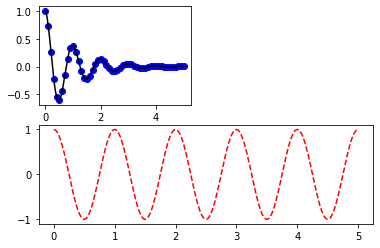

In [40]:
plt.figure(1)
plt.subplot(221)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

Just a figure and one subplot:

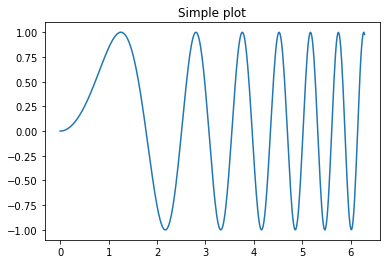

In [42]:
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')
plt.show()

Two subplots, the axes array is 1-d

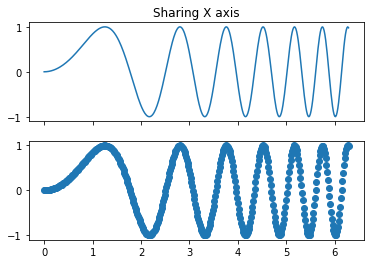

In [43]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x, y)
axarr[0].set_title('Sharing X axis')
axarr[1].scatter(x, y)
plt.show()

Two subplots, unpack the axes array immediately


Text(0.5, 1.0, 'This is something else')

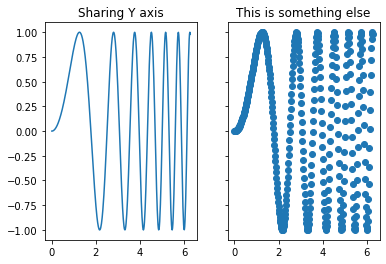

In [44]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)
ax2.set_title('This is something else')

Three subplots sharing both x/y axes

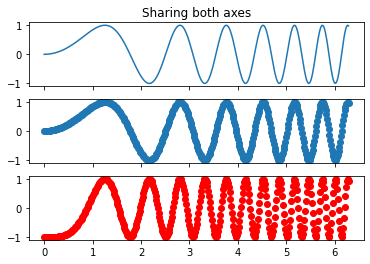

In [45]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
plt.show()

Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.

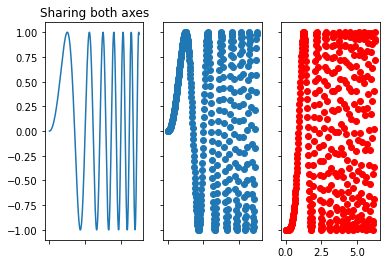

In [46]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')

f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.show()

Row and column sharing:

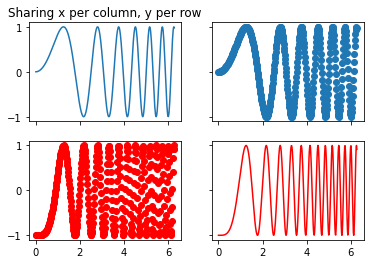

In [47]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')
plt.show()

## Adding Text

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(618)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

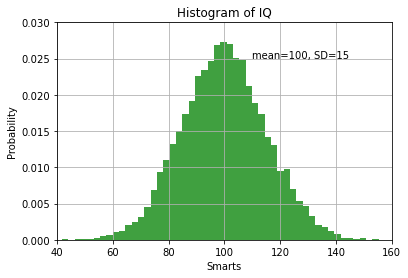

In [49]:
# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(np.mean(x)+10, .025, 'mean=100, SD=15')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

See also [text properties and layout](https://matplotlib.org/users/text_props.html#text-properties).

## Annotating Text

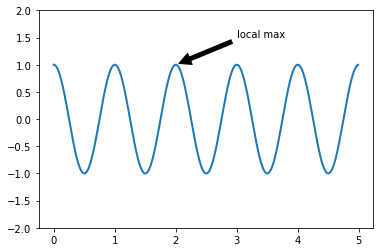

In [50]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)
plt.show()

### <font color="magenta">Q3: Using the McDonald's menu dataset, plot any 2 continuous variables as a scatterplot and annotate an interesting feature (e.g. local max, outlier, etc.).</font>

In [51]:
import pandas as pd

In [52]:
menu = pd.read_csv('https://github.com/umsi-data-science/data/raw/main/menu.csv')

In [53]:
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


Text(1000, 100, 'high fat, high calorie')

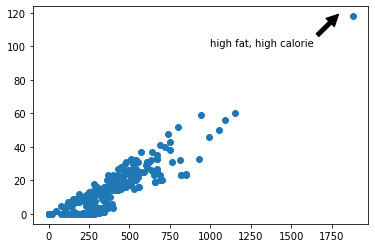

In [54]:
plt.scatter(menu['Calories'],menu['Total Fat'])

plt.annotate('high fat, high calorie', xy=(1800, 120), xytext=(1000, 100),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

## Using specific types of plots via pyplot

In addition to scatterplots, pyplot offers a number of other plot types.  These can be accessed via convenience functions such as ```scatter()```, ```hist()```, ```bar()```, ```barh()```, and ```pie()```, amongst others:

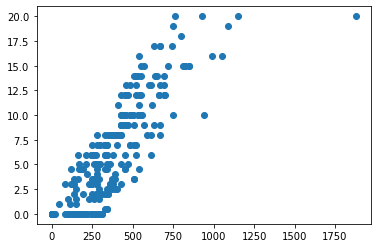

In [55]:
plt.scatter(menu["Calories"],menu["Saturated Fat"])
plt.show()

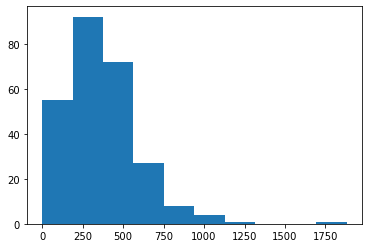

In [56]:
plt.hist(menu['Calories'])
plt.show()

### <font color="magenta">Q4: Create a histogram of any one of the continuous variables from the McDonalds menu dataset.

In [57]:
# insert your code here

## Pandas and matplotlib integration

Cumbersome?  Yes.  A better way?  Use the matplotlib integration from pandas:

<AxesSubplot:ylabel='Frequency'>

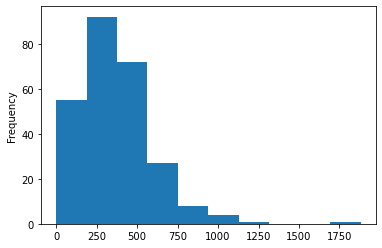

In [58]:
menu['Calories'].plot(kind='hist')

Text(0.5, 1.0, 'Calories distribution')

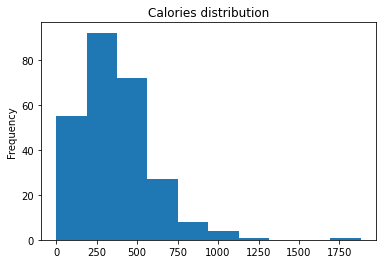

In [59]:
f = menu['Calories'].plot(kind='hist')
f.set_title('Calories distribution')

Here are the valid values for "kind":

kind :
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot

## Bar plots with groupby()

In [60]:
categories = menu.groupby('Category').size()

In [61]:
categories

Category
Beef & Pork           15
Beverages             27
Breakfast             42
Chicken & Fish        27
Coffee & Tea          95
Desserts               7
Salads                 6
Smoothies & Shakes    28
Snacks & Sides        13
dtype: int64

<AxesSubplot:ylabel='Category'>

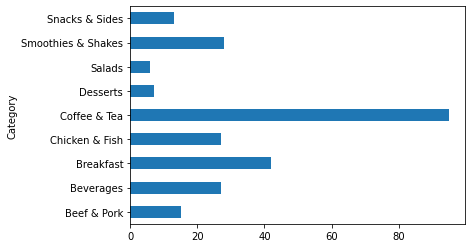

In [62]:
categories.plot(kind='barh')

In [63]:
categories_sorted = categories.sort_values(ascending=True)

<AxesSubplot:ylabel='Category'>

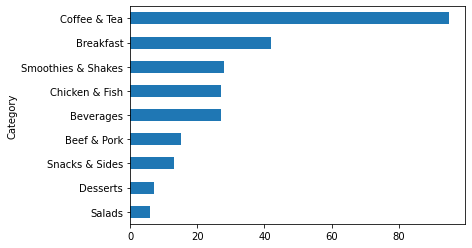

In [64]:
categories_sorted.plot(kind='barh')

### <font color="magenta">Q5: Create a new column in the menu DataFrame called "Sugary" whose value is 1 if the values of "Sugars" is greater than 20, otherwise set it to 0. 

    Hint: use np.where(...) (look it up in the documentation)

In [65]:
menu.tail()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6
259,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Snack),7.1 oz (202 g),410,150,16.0,25,8.0,38,0.0,...,57,19,1,5,51,10,10,0,30,4


In [66]:
menu['Sugary'] = np.where(menu['Sugars'] > 20, 1, 0)

In [67]:
menu['Sugary'] = np.where(menu['Sugars'] > 20, 1, 0)

In [68]:
menu.sample(10)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Sugary
215,Coffee & Tea,Iced Mocha with Nonfat Milk (Medium),16 fl oz cup,290,45,5.0,8,3.5,17,0.0,...,17,1,5,43,10,15,0,30,6,1
96,Snacks & Sides,Small French Fries,2.6 oz (75 g),230,100,11.0,17,1.5,8,0.0,...,10,2,10,0,2,0,30,0,4,0
187,Coffee & Tea,Nonfat Caramel Mocha (Small),12 fl oz cup,250,30,3.5,5,2.0,10,0.0,...,15,1,3,41,10,10,0,35,2,1
83,Chicken & Fish,Filet-O-Fish,5 oz (142 g),390,170,19.0,29,4.0,19,0.0,...,13,2,7,5,15,2,0,15,10,0
17,Breakfast,Southern Style Chicken Biscuit (Large Biscuit),5.5 oz (157 g),470,220,24.0,37,9.0,45,0.0,...,15,3,11,4,17,4,2,8,15,0
68,Chicken & Fish,Bacon Buffalo Ranch McChicken,5.7 oz (161 g),430,190,21.0,32,5.0,25,0.0,...,14,2,7,6,20,2,10,15,15,0
88,Salads,Premium Southwest Salad with Crispy Chicken,12.3 oz (348 g),450,190,22.0,33,4.5,22,0.0,...,14,7,28,12,23,170,30,15,15,0
212,Coffee & Tea,Iced Mocha (Medium),16 fl oz cup,350,110,13.0,19,8.0,38,0.0,...,17,1,5,43,9,10,0,30,6,1
30,Breakfast,Big Breakfast with Egg Whites (Large Biscuit),10.1 oz (286 g),690,370,41.0,63,14.0,72,0.0,...,18,4,17,4,26,4,2,10,15,0
119,Beverages,Dr Pepper (Medium),21 fl oz cup,190,0,0.0,0,0.0,0,0.0,...,18,0,0,51,0,0,0,0,0,1


## Create a stacked bar plot by using a 2-level groupby() followed by an unstack():

In [69]:
menu.groupby(["Category","Sugary"]).size()#.unstack()#.plot(kind = "bar")

Category            Sugary
Beef & Pork         0         15
Beverages           0         11
                    1         16
Breakfast           0         40
                    1          2
Chicken & Fish      0         27
Coffee & Tea        0         22
                    1         73
Desserts            0          4
                    1          3
Salads              0          6
Smoothies & Shakes  1         28
Snacks & Sides      0         12
                    1          1
dtype: int64

In [70]:
menu.groupby(["Category","Sugary"]).size().unstack()#.plot(kind = "bar")

Sugary,0,1
Category,,
Beef & Pork,15.0,NaN
Beverages,11.0,16.0
Breakfast,40.0,2.0
Chicken & Fish,27.0,NaN
Coffee & Tea,22.0,73.0
Desserts,4.0,3.0
Salads,6.0,NaN
Smoothies & Shakes,NaN,28.0
Snacks & Sides,12.0,1.0


<AxesSubplot:xlabel='Category'>

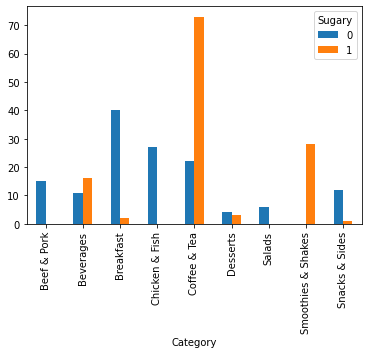

In [71]:
menu.groupby(["Category","Sugary"]).size().unstack().plot(kind = "bar")

<AxesSubplot:xlabel='Category'>

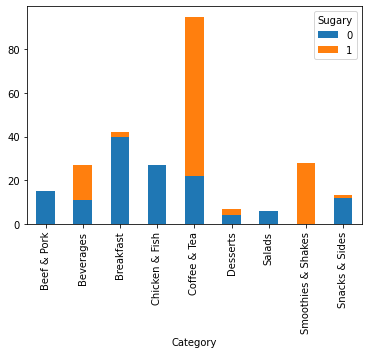

In [72]:
menu.groupby(["Category","Sugary"]).size().unstack().plot(kind = "bar", stacked = True)

<AxesSubplot:xlabel='Category'>

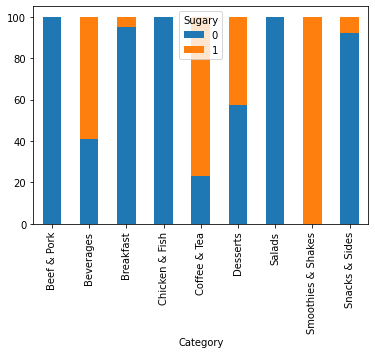

In [73]:
menu.groupby(['Category','Sugary']).size().groupby(by='Category').apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

### <font color="magenta">Q6: Repeat the above steps to generate three bar plots for any other continuous variable that you split into "high" and "low" values, just as with did with "Sugars" above.

In [74]:
menu.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)', 'Sugary'],
      dtype='object')

In [75]:
menu["Total Fat"].describe()

count    260.000000
mean      14.165385
std       14.205998
min        0.000000
25%        2.375000
50%       11.000000
75%       22.250000
max      118.000000
Name: Total Fat, dtype: float64

<AxesSubplot:xlabel='Category'>

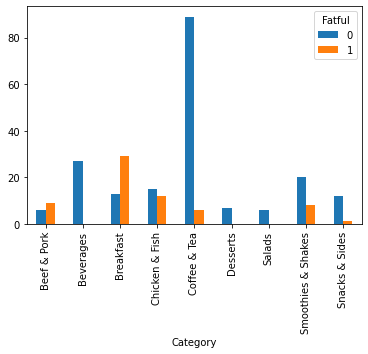

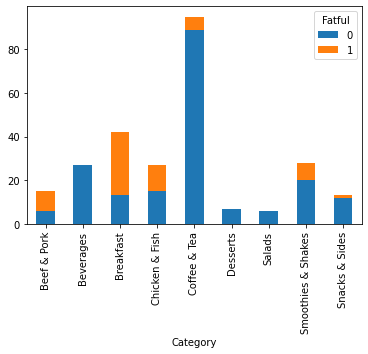

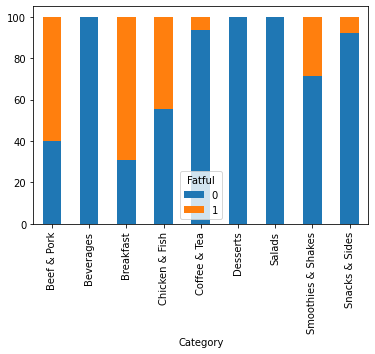

In [76]:
menu['Fatful'] = np.where(menu['Total Fat'] > 22.25, 1, 0)
menu.groupby(["Category","Fatful"]).size().unstack().plot(kind = "bar")
menu.groupby(["Category","Fatful"]).size().unstack().plot(kind = "bar",stacked=True)
menu.groupby(['Category','Fatful']).size().groupby(by='Category').apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

### Pie Charts

There are many issues with pie charts, and the one below is a good example of what not to do, but everyone wants to know how to make them:

<AxesSubplot:title={'center':'Menu Categories'}, ylabel='None'>

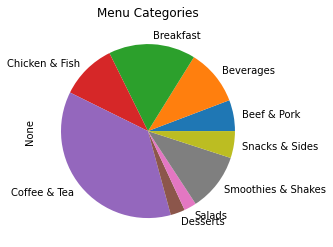

In [77]:
# don't do this...
categories.plot(kind='pie',title='Menu Categories')

## Subplots (again)

In addition to the way we used subplots in the previous class, we can use the ```.subplots()``` function to generate mulitple plots within a figure.  ```subplots()``` returns a set of axes on which we can make plots.

To demonstrate how this works, let's fill in just one of the subplots:


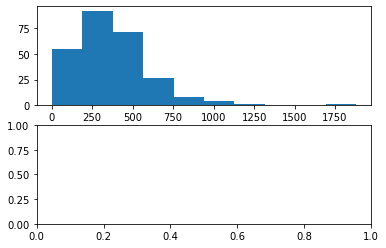

In [78]:
f, (ax1, ax2) = plt.subplots(2) # if only 1 argument, we assume it's the number of rows
ax1.hist(menu['Calories'])
plt.show()

Now let's fill in both subplots:

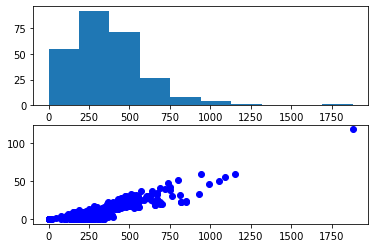

In [79]:
f, (ax1, ax2) = plt.subplots(2)
ax1.hist(menu['Calories'])
ax2.plot(menu['Calories'],menu['Total Fat'],'bo')
plt.show()

Now let's make a 2x2 layout of 4 plots.  Note the structure of the return values from the subplots function:

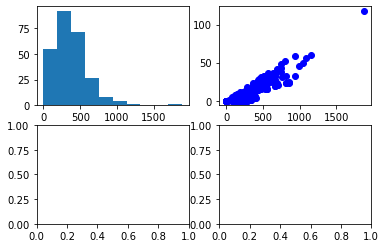

In [80]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.hist(menu['Calories'])
ax2.plot(menu['Calories'],menu['Total Fat'],'bo')
plt.show()

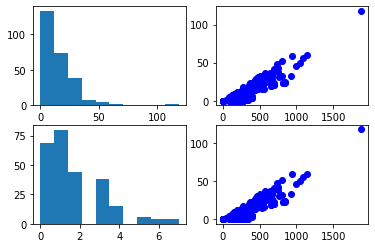

In [81]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.hist(menu['Total Fat'])
ax2.plot(menu['Calories'],menu['Total Fat'],'bo')
ax3.hist(menu['Dietary Fiber'])
ax4.plot(menu['Calories'],menu['Total Fat'],'bo')
plt.show()

Alternatively, we can use the pandas-matplotlib integration.  Note the use of the ```ax=``` keyword arg.

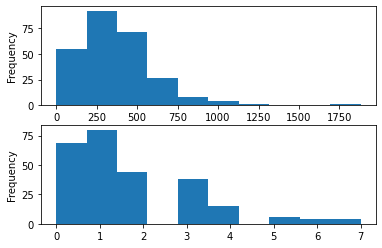

In [82]:
f, (ax1, ax2) = plt.subplots(2)
menu['Calories'].plot(ax=ax1, kind='hist')
menu['Dietary Fiber'].plot(ax = ax2,kind='hist')
plt.show()

### <font color="magenta">Q7: Use subplots() to create a figure consisting of 4 plots.

They could be scatter plots, histograms, bar charts, pie plots, or any of the kinds (repeated here for your convenience):
    
    kind :
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot

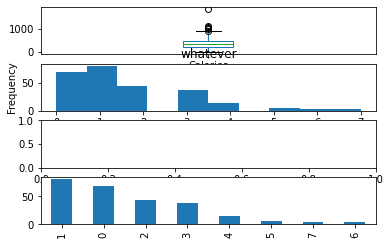

In [83]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4)
menu['Calories'].plot(ax=ax1, kind='box')
menu['Dietary Fiber'].plot(ax = ax2,kind='hist')
menu['Dietary Fiber'].value_counts().plot(ax = ax4,kind='bar')
ax2.set_title('whatever')
plt.show()

### [xkcd](https://xkcd.com/1838/) style plots (just for fun)

Note that we can scope the use of any ```plt.``` function by using a ```with``` statement.

Note also that we can save a figure as a file by using ```savefig(...)``` (as shown below).

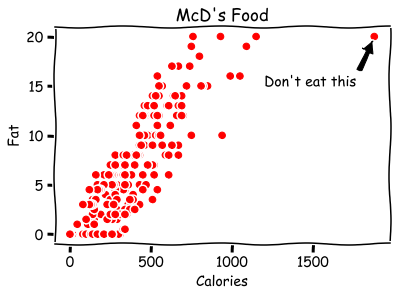

In [84]:
with plt.xkcd():
        # This figure will be in XKCD-style
        plt.plot(menu["Calories"],menu["Saturated Fat"],'ro')
        plt.title("McD's Food")
        plt.xlabel('Calories')
        plt.ylabel('Fat')
        plt.annotate("Don't eat this",xytext=(1200,15),xy=(1880,20),arrowprops=dict(facecolor='black', shrink=0.1))
        plt.savefig('xkcd.png',format='png') # alternatively, we could save as a pdf, svg, ps, or eps
        plt.show()

### <font color="magenta">Q8: Create an xkcd-style plot of any of the previous plots you created.  Make sure you annotate it with at least one interesting feature.  </font>
**Share your saved figure on the Slack #general channel**.

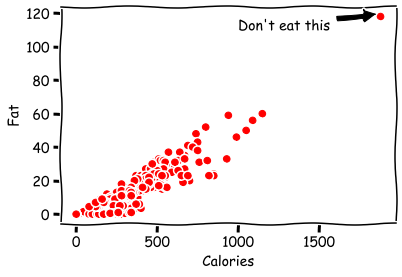

In [85]:
with plt.xkcd():
        # This figure will be in XKCD-style
        plt.plot(menu["Calories"],menu["Total Fat"],'ro')

        plt.xlabel('Calories')
        plt.ylabel('Fat')
        plt.annotate("Don't eat this",xytext=(1000,110),xy=(1880,120),arrowprops=dict(facecolor='black', shrink=0.1))
        plt.savefig('xkcd.png',format='png') # alternatively, we could save as a pdf, svg, ps, or eps
        plt.show()

## Simple (univariate) statistics

In [86]:
# The weights of a herd of 80 cows
# Fixing random state for reproducibility
np.random.seed(618)

measures = (np.random.standard_normal(80)*150+1000).astype(int)
measures

array([1167, 1075,  893, 1066, 1025, 1084,  665, 1021, 1085,  886, 1161,
        959, 1008, 1004,  953, 1050, 1091,  857,  881,  891, 1048, 1213,
       1094, 1031,  935, 1014, 1054,  933, 1053, 1026,  844,  996, 1115,
        836,  884,  901,  801, 1226, 1091, 1448, 1119, 1215, 1199, 1030,
       1163,  987,  925, 1127, 1108, 1146, 1400,  984, 1035,  841, 1015,
        922, 1042, 1026,  888,  987,  933,  850, 1237, 1018,  955, 1308,
        817, 1146, 1022,  884, 1200,  979,  787, 1056, 1105, 1101, 1054,
       1285,  770,  710])

In [87]:
# equivalently
# Fixing random state for reproducibility
np.random.seed(618)

measures = (np.random.normal(1000,150,80)).astype(int)
measures

array([1167, 1075,  893, 1066, 1025, 1084,  665, 1021, 1085,  886, 1161,
        959, 1008, 1004,  953, 1050, 1091,  857,  881,  891, 1048, 1213,
       1094, 1031,  935, 1014, 1054,  933, 1053, 1026,  844,  996, 1115,
        836,  884,  901,  801, 1226, 1091, 1448, 1119, 1215, 1199, 1030,
       1163,  987,  925, 1127, 1108, 1146, 1400,  984, 1035,  841, 1015,
        922, 1042, 1026,  888,  987,  933,  850, 1237, 1018,  955, 1308,
        817, 1146, 1022,  884, 1200,  979,  787, 1056, 1105, 1101, 1054,
       1285,  770,  710])

### <font color="magenta">Q9: Create some objects of your own
Think of some object and some property of that object.  I used cows and their weights.  Pick something that you know something about, and create a NumPy array of some number of them (ideally between 20 and 1000), recording some property.  So you might choose something like the height of undergraduate students, etc.  Pick somethink that will *likely* have a normal distribution (which is probably most things you can think of.</font>

First, pick the number that you want and assign it to numberOfObjects, then pick the mean value and assign it to meanOfProperty, and finally pick the variance and assign it to varianceOfProperty.  It doesn't matter what you pick, but if you're unsure pick 1/5 of the mean.

In [88]:
numberOfObjects = 100    # change np.NaN to some number between 20 and 50000
meanOfProperty = 50     # change np.NaN to the mean value of the property you're interested in
standardDeviationOfProperty = 10 # change np.NaN to the variance of the property -- try meanOfProperty/5 if you have no idea

Now create some data by asking for a random sample from a normal distribution, scaled so that it matches the mean and variance you want:

In [89]:
things = np.random.standard_normal(numberOfObjects)*standardDeviationOfProperty+meanOfProperty
# And let's say we want integers instead of floats:
things = things.astype(int)
things

array([50, 44, 53, 45, 44, 51, 53, 33, 51, 37, 33, 46, 47, 49, 64, 70, 55,
       51, 35, 41, 59, 57, 36, 47, 63, 44, 37, 57, 36, 58, 56, 41, 50, 44,
       56, 68, 37, 57, 50, 61, 33, 60, 58, 46, 70, 48, 63, 34, 42, 50, 29,
       36, 43, 50, 45, 40, 38, 39, 41, 59, 47, 41, 51, 53, 27, 34, 62, 49,
       70, 66, 60, 56, 59, 53, 44, 38, 51, 46, 51, 60, 55, 58, 48, 48, 48,
       46, 34, 71, 50, 50, 55, 48, 40, 51, 57, 42, 51, 46, 49, 49])

## Measures of central tendency
* Mean
* Median 
* Mode

## Mean

Add up all the values and divide by the number of values:

$$mean = \frac {\sum{x_i}} {n}$$


In [90]:
sum(measures)/len(measures)

1021.7625

In [91]:
np.mean(measures) # find the mean

1021.7625

## Median

sort all the numbers and find the one in the middle

In [92]:
measures = np.sort(measures)
measures

array([ 665,  710,  770,  787,  801,  817,  836,  841,  844,  850,  857,
        881,  884,  884,  886,  888,  891,  893,  901,  922,  925,  933,
        933,  935,  953,  955,  959,  979,  984,  987,  987,  996, 1004,
       1008, 1014, 1015, 1018, 1021, 1022, 1025, 1026, 1026, 1030, 1031,
       1035, 1042, 1048, 1050, 1053, 1054, 1054, 1056, 1066, 1075, 1084,
       1085, 1091, 1091, 1094, 1101, 1105, 1108, 1115, 1119, 1127, 1146,
       1146, 1161, 1163, 1167, 1199, 1200, 1213, 1215, 1226, 1237, 1285,
       1308, 1400, 1448])

In [93]:
80/2

40.0

In [94]:
81/2

40.5

In [95]:
80//2

40

In [96]:
81//2

40

In [97]:
len(measures)//2

40

In [98]:
measures[len(measures)//2]  # find middle value

1026

In [99]:
np.median(measures)

1025.5

## Another alternative: Mode

* mode = most common value
* Unfortunately not in default numpy


In [100]:
measures

array([ 665,  710,  770,  787,  801,  817,  836,  841,  844,  850,  857,
        881,  884,  884,  886,  888,  891,  893,  901,  922,  925,  933,
        933,  935,  953,  955,  959,  979,  984,  987,  987,  996, 1004,
       1008, 1014, 1015, 1018, 1021, 1022, 1025, 1026, 1026, 1030, 1031,
       1035, 1042, 1048, 1050, 1053, 1054, 1054, 1056, 1066, 1075, 1084,
       1085, 1091, 1091, 1094, 1101, 1105, 1108, 1115, 1119, 1127, 1146,
       1146, 1161, 1163, 1167, 1199, 1200, 1213, 1215, 1226, 1237, 1285,
       1308, 1400, 1448])

In [101]:
from scipy import stats
stats.mode(measures)

ModeResult(mode=array([884]), count=array([2]))

In [102]:
import statistics
statistics.mode([1,2,2,3,4])

2

In [103]:
try:
    import statistics
    statistics.mode(measures)
except:
    print("oops")

oops


In [104]:
try:
    import statistics
    statistics.multimode(measures) # only available with python 3.8+
except:
    print("oops")

oops


### <font color="magenta">Q10: Calculate the mean, median and mode of your "things"

Step 1: Just run the following cell (assumes you have some data in an np array called "things")

In [105]:
from scipy import stats # just in case we didn't already do it

thingsMean = np.mean(things) # replace 0 with your code
thingsMedian = np.median(things) # replace 0 with your code
thingsMode = 100 # replace 0 with your code

print(thingsMean, thingsMedian, thingsMode)

49.04 49.0 100


Step 2: Now, to demonstrate what happens to mean, median and mode when you add an outlier, append some crazy big value to the end of your things.  But let's not mess up our things array, so let's copy it first

In [106]:
outliers = 10000 # change np.nan to some extreme value

things2 = things.copy()
things2 = np.append(things2,outliers)
things2Mean = np.mean(things2).round(2)
things2Median = np.median(things2)
things2Mode = stats.mode(things2)[0].item()

print(things2Mean, things2Median, things2Mode)

147.56 49.0 51


Step 3: Record, in your own words, what happened to each of the mean, median and mode when you added that value:

Insert your answer here.

# <font color="magenta"></font>

## Measures of dispersion

* Percentile cutoffs
 * Interpercentile range
* Variance
* Standard Deviation

## Percentiles

* In a *sorted* list, find the threshold so that data is split
 * 5th percentile -- bottom 5% of measures below threshold
 * 25th percentile -- bottom 25% of measures below
 * 97th percentile -- bottom 97% of mesures below

## Numpy does this well

`np.percentile(array,percentile,
               interpolation='linear')`

* linear: i + (j - i) 
* fraction, where fraction is the fractional part of the index surrounded by i and j.
* lower: i.
* higher: j.
* nearest: i or j, whichever is nearest.
* midpoint: (i + j) / 2.


In [107]:
np.percentile(measures,25) # the 25th percentile

924.25

In [108]:
np.percentile(measures,25,interpolation='higher') # bump it up to the next higher real value from the data

925

## Interpercentile Range

* Sometimes we want to some range
 * e.g., 5th -- 95th percentile: 90% of measures sit here

In [109]:
print(np.percentile(measures,5),"-",np.percentile(measures,95))

800.3000000000001 - 1239.3999999999999


## Variance

How does the data spread around the mean?

$$ variance = \frac{\sum{(x_i - \mu)^2}}{n}$$

where, $\mu$ is the mean

$$ mu = \frac{\sum{x_i}}{n}$$

## Standard Deviation

* Measure of dispersion 

![standard deviation](https://github.com/umsi-data-science/si618-student/raw/main/assets/Standard_deviation_diagram.svg.png)
(https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/640px-Standard_deviation_diagram.svg.png "sd")

In [110]:
print(np.percentile(measures,2.5),"-",np.percentile(measures,97.5))
print(np.var(measures))
print(np.std(measures))  # this should be the square root of variance

768.5 - 1310.2999999999993
20879.33109375
144.4968203586155


In [111]:
s = np.std(measures)
m = np.mean(measures)
print(m-2*s)
print(m+2*s)


732.768859282769
1310.7561407172311


### <font color="magenta">Q11: Measures of dispersion</font>
Examine the 2.5-97.5 percentile range and the standard deviation of your "things".
Does the output for standard deviation match what you asked for when you first generated the data above? What's the relationship between the 2.5th-to-97.5th percentile range and the standard deviation? Answer below

In [112]:
# insert your code here

Insert your explanation here.

## Visualizing data with Seaborn
* Visualization package built on top of matplotlib
* It's meant to make your life better
* Plays well with pandas, numpy, scipy, and statsmodels
* Many different visualization are included:
 * Strip plots, Swarm plots, Violin plots
 * Box plots
 * Histograms
 
 We need to import the package, and it's typically imported as sns:
 
 ```
 import seaborn as sns
 ``` 
 
 and don't forget to inline matplotlib (that's a jupyter thing):

 ```
 %matplotlib inline
 ```

[seaborn.pydata.org](http://seaborn.pydata.org)

## Seaborn versus Matplotlib
* Matplotlib
     * Low-level, basis for many packages
     * Painful to construct certain graphs
     * Not Pandas friendly
     * Not interactive
* Seaborn
     * Pandas friendlier
     * Great for some stats plots


In [113]:
import seaborn as sns

## Strip Plot

<AxesSubplot:>

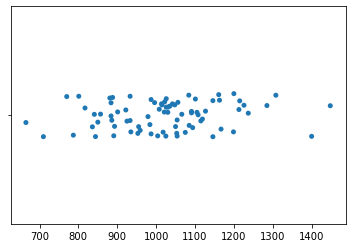

In [114]:
%matplotlib inline
import seaborn as sns  # you might need to do: conda install seaborn
sns.stripplot(x=measures)

## Swarm Plot

<AxesSubplot:>

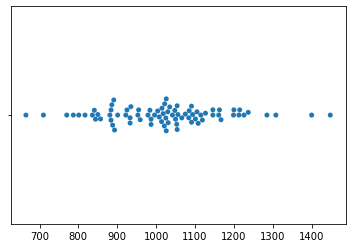

In [115]:
sns.swarmplot(x=measures)

## Violin Plot
* If we have too much data

<AxesSubplot:>

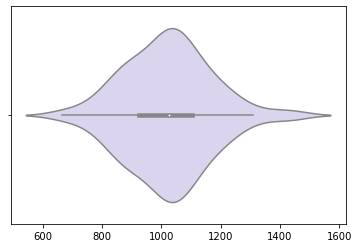

In [116]:
sns.violinplot(x=measures,color="#d7d0f3")

## Box Plot

<AxesSubplot:>

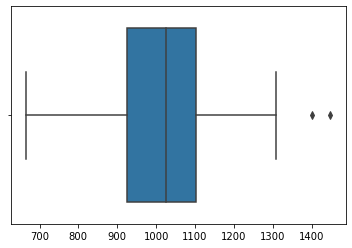

In [117]:
sns.boxplot(x=measures) 

And we can manipulate the underlying plot to control different features.  See 
https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python#34162641
and
https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots for explanations about ```plt.subplots()```



(array([ 600.,  700.,  800.,  900., 1000., 1100., 1200., 1300., 1400.,
        1500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

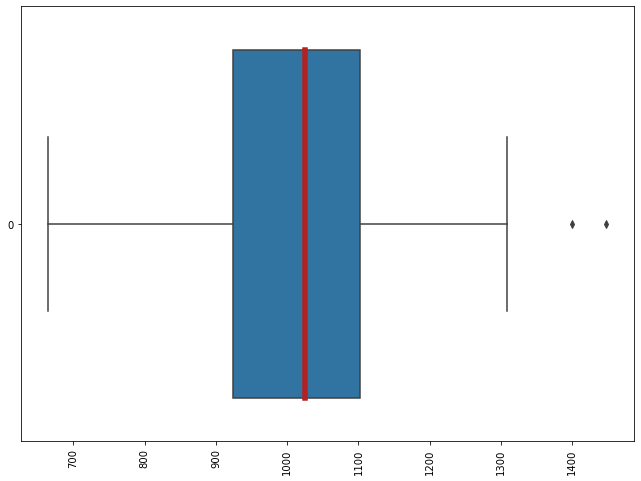

In [118]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
medianprops = dict( linewidth=5.5, color='firebrick')
sns.boxplot(medianprops=medianprops,data=measures,orient='h')
plt.xticks(rotation=90)


## Histogram

We're going to use this a lot.  Seaborn puts a nice smooth line over a distribution.  We'll talk about that soon, but for now just think about it as an extrapolation:  if we had a bunch more data, the distribution would eventually smooth out to something that looks like the line.

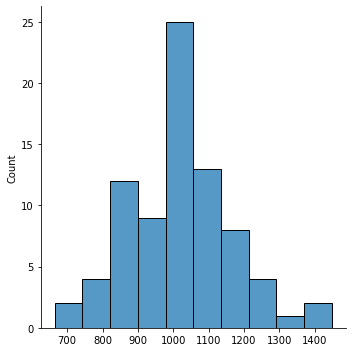

In [119]:
# x axis = value, y axis = count (frequency)
sns.displot(measures, kde=False); 

/Users/cteplovs/opt/anaconda3/envs/wn2020/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/cteplovs/opt/anaconda3/envs/wn2020/lib/python3.6/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


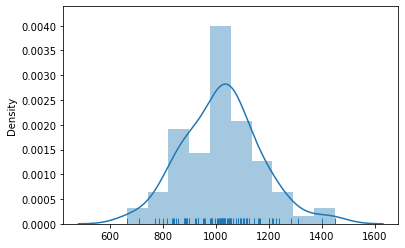

In [120]:
sns.distplot(measures, rug=True); # show a strip plot on bottom -- we call it a "rug"

### <font color="magenta">Q12: Test driving Seaborn</font>
Your turn:  create the above plots (strip, swarm, violin, box, and histogram for your "things".

In [ ]:
# insert your code here

Chose two plots from the ones you generated above and in your own words explain what each of them tells you about your data.

Insert your answer here

## Visualizing the menu data using Seaborn

<AxesSubplot:xlabel='Calories', ylabel='Count'>

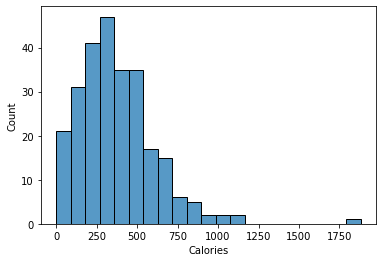

In [122]:
sns.histplot(menu.Calories)

<AxesSubplot:xlabel='Total Fat', ylabel='Count'>

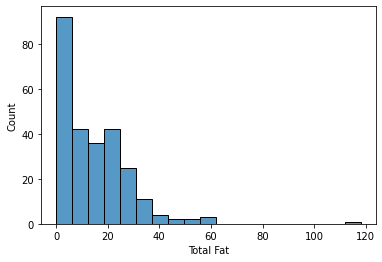

In [125]:
sns.histplot(menu['Total Fat'])

In [124]:
print(sns.__version__)

0.11.0


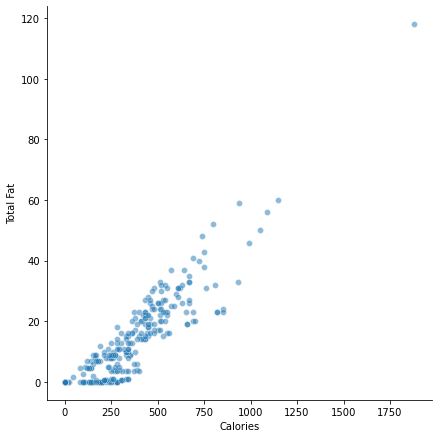

In [126]:
# Relationship between petal_width & petal_length by species
sns.relplot(x="Calories", y="Total Fat",# hue="Category",
            sizes=(40, 400), alpha=.5, 
            height=6, data=menu)

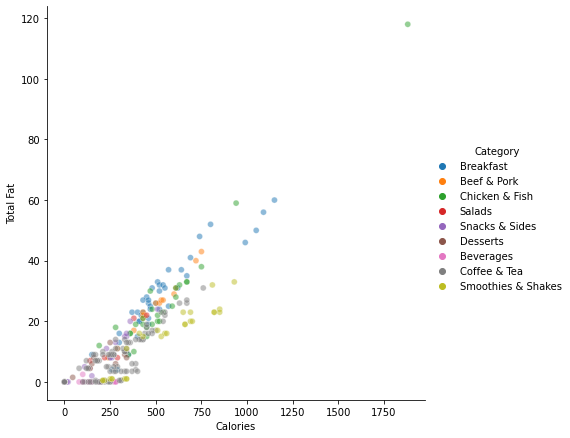

In [127]:
# Relationship between petal_width & petal_length by species
sns.relplot(x="Calories", y="Total Fat",hue="Category",
            sizes=(40, 400), alpha=.5, 
            height=6, data=menu)

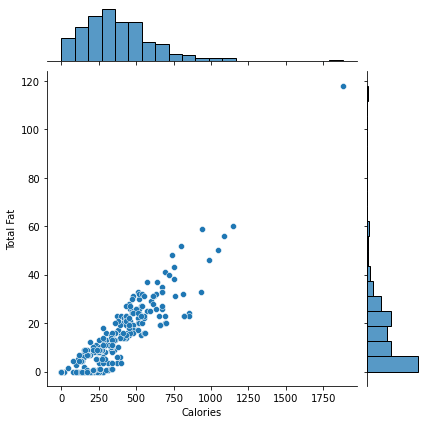

In [128]:
sns.jointplot(x='Calories',y='Total Fat',data=menu)

It's a bit difficult to see where the interesting areas in the plot are, so it's worth trying a hexbin plot.  Go ahead and copy the above  code block and add ```kind="hex"``` to the jointplot parameters. 

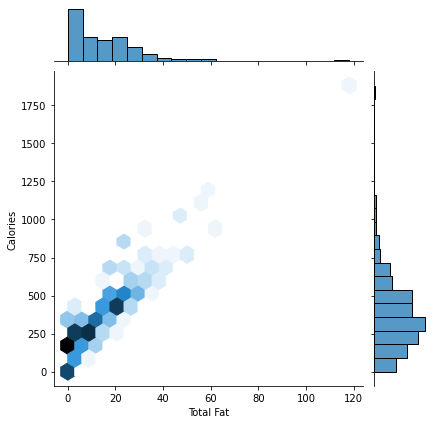

In [129]:
# insert your code here
sns.jointplot(x='Total Fat',y='Calories',kind="hex",data=menu)

Now, take a look at what happens when you set ```kind="kde"```

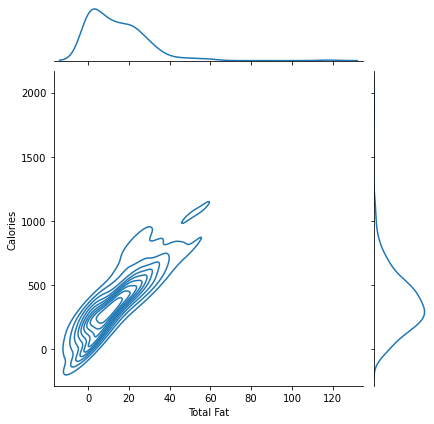

In [130]:
sns.jointplot(x='Total Fat',y='Calories',kind="kde",data=menu)

Finally, you may want to look at all the numeric variables in your
dataset. Use ```pairplot``` to do this:


In [132]:
menu[menu['Category'] == 'Breakfast']

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Sugary,Fatful
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,4,17,3,17,10,0,25,15,0,0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,4,17,3,18,6,0,25,8,0,0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,4,17,2,14,8,0,25,10,0,1
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,4,17,2,21,15,0,30,15,0,1
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,4,17,2,21,6,0,25,10,0,1
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,210,23.0,36,9.0,46,1.0,...,4,18,3,26,15,2,30,20,0,1
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,230,26.0,40,13.0,65,0.0,...,2,7,3,19,10,8,15,15,0,1
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,47,14.0,68,0.0,...,3,12,4,19,15,8,20,20,0,1
8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",5.4 oz (153 g),410,180,20.0,32,11.0,56,0.0,...,2,7,3,20,2,8,15,10,0,0
9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",5.9 oz (167 g),470,220,25.0,38,12.0,59,0.0,...,3,12,4,20,6,8,15,15,0,1


In [133]:
menu.query("Category == 'Breakfast'")

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Sugary,Fatful
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,4,17,3,17,10,0,25,15,0,0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,4,17,3,18,6,0,25,8,0,0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,4,17,2,14,8,0,25,10,0,1
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,4,17,2,21,15,0,30,15,0,1
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,4,17,2,21,6,0,25,10,0,1
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,210,23.0,36,9.0,46,1.0,...,4,18,3,26,15,2,30,20,0,1
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,230,26.0,40,13.0,65,0.0,...,2,7,3,19,10,8,15,15,0,1
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,47,14.0,68,0.0,...,3,12,4,19,15,8,20,20,0,1
8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",5.4 oz (153 g),410,180,20.0,32,11.0,56,0.0,...,2,7,3,20,2,8,15,10,0,0
9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",5.9 oz (167 g),470,220,25.0,38,12.0,59,0.0,...,3,12,4,20,6,8,15,15,0,1


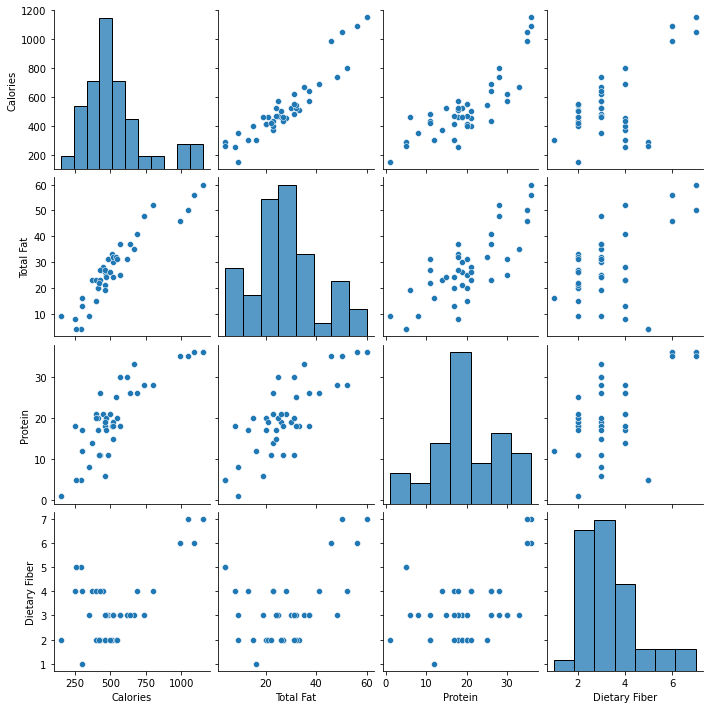

In [136]:
sns.pairplot(menu.query("Category == 'Breakfast'"),vars=['Calories','Total Fat','Protein','Dietary Fiber'])

We can get fancier by using a different column to set the color (or "hue"):

Try running the following code:

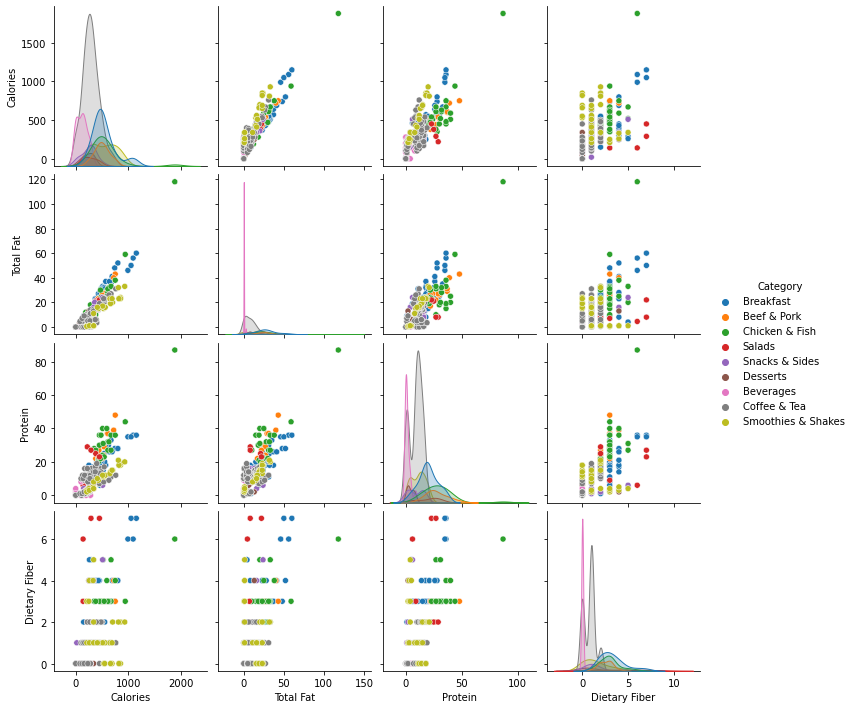

In [139]:
sns.pairplot(menu,hue="Category",vars=['Calories','Total Fat','Protein','Dietary Fiber'])

Now let's introduce some correlations.  We're not going to spend time on learning about the 
theory behind correlation, as you've done that in the statistics prerequisite for this course.
Instead, we're going to jump right in and annotate a graph with a lot of statistical information:

In [140]:
from scipy import stats

AttributeError: 'JointGrid' object has no attribute 'annotate'

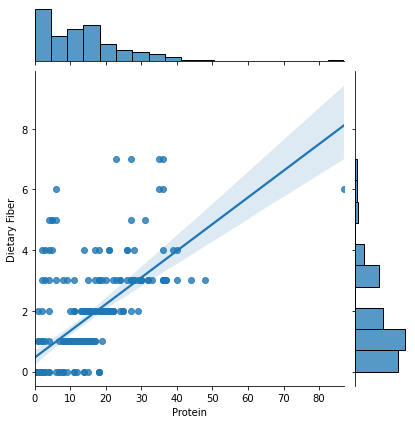

In [141]:
# ignore the warning about deprecated annotation
g = sns.JointGrid(data=menu,x='Protein',y='Dietary Fiber')
g = g.plot(sns.regplot, sns.histplot)
g = g.annotate(stats.pearsonr)

## Why do we care about distributions?
## World is not normal
* Many other kinds of distributions
* We can tell what they are by looking at distribution

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Uniform

<AxesSubplot:ylabel='Count'>

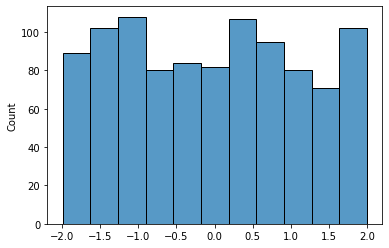

In [143]:
uniform = np.random.uniform(-2,2,1000)  # low,high,count
sns.histplot(uniform)

## Bimodal

<AxesSubplot:ylabel='Count'>

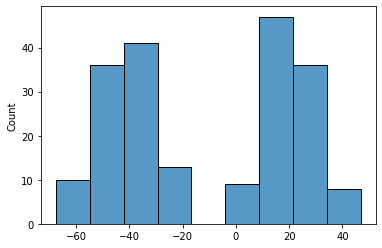

In [145]:
bimodal = np.append(np.random.normal(-40,10,100),
                    np.random.normal(20,10,100))
sns.histplot(bimodal)

# Poisson

$$ P(k~events~in~interval) = \frac{\lambda^ke^{-\lambda}}{k!} $$

$\lambda$ is the event rate

Examples
* Meteor strikes
* Arrival of patients to hospital

<AxesSubplot:ylabel='Count'>

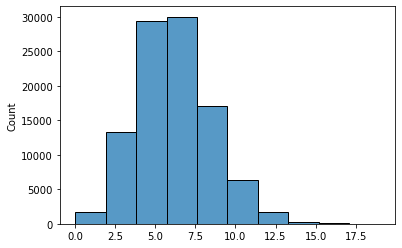

In [148]:
# as lambda goes up --> looks more normal
pois = np.random.poisson(6,100000) # lambda, count 
sns.histplot(pois,bins=10)

# Power/Zipf/Pareto

"long tail"
* degree distribution
* movie/music popularity
* words


[None]

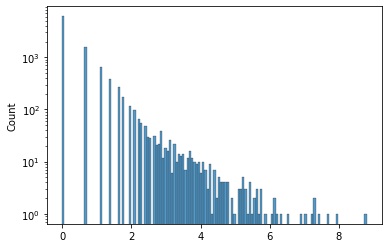

In [149]:
power = np.random.zipf(2,10000)
ax = sns.histplot(np.log(power))
ax.set(yscale="log")

## Visual Tests on Data

/Users/cteplovs/opt/anaconda3/envs/wn2020/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

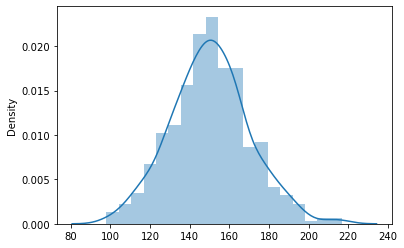

In [153]:
testdata = (np.random.standard_normal(500)*20+150).astype(int)
sns.distplot(testdata)

## Run Sequence
* Run Sequence (index versus value)
* flat and non-drifting
 * fixed-location assumption holds
* vertical spread same over the entire plot, 
 * then the fixed-variation assumption holds.

/Users/cteplovs/opt/anaconda3/envs/wn2020/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'i')

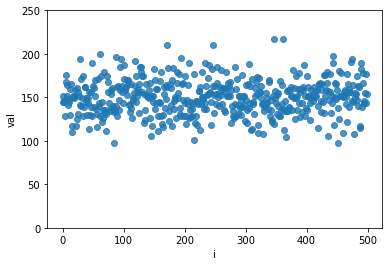

In [154]:
ax = sns.regplot(np.arange(len(testdata)),testdata,fit_reg=False)
ax.set_ylim(0,250)
ax.set_ylabel("val")
ax.set_xlabel("i")

/Users/cteplovs/opt/anaconda3/envs/wn2020/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

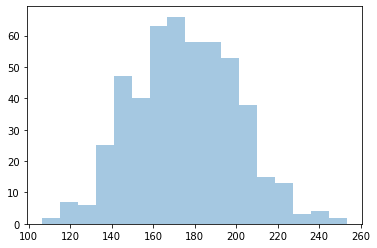

In [155]:
drifting = np.array([testdata[i]+i*(.1) for i in np.arange(len(testdata))])
sns.distplot(drifting,kde=False)

Text(0.5, 0, 'i')

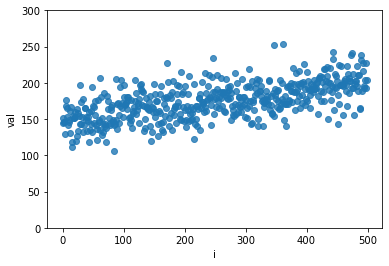

In [156]:
ax = sns.regplot(np.arange(len(drifting)),drifting,fit_reg=False)
ax.set_ylim(0,300)
ax.set_ylabel("val")
ax.set_xlabel("i")

<AxesSubplot:>

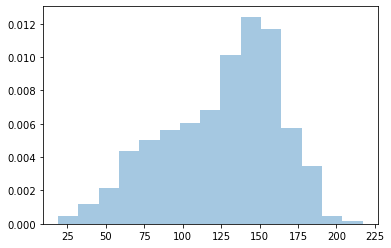

In [157]:
expanding = np.array([(testdata[i]+i*np.random.randint(-1,1)*.2)
                     for i in np.arange(len(testdata))])
sns.distplot(expanding,kde=False,norm_hist=True)

Text(0.5, 0, 'i')

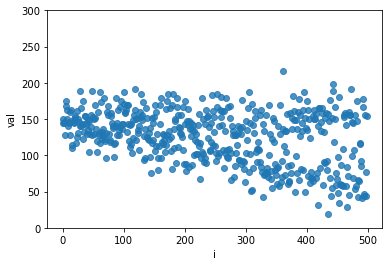

In [158]:
ax = sns.regplot(np.arange(len(expanding)),expanding,fit_reg=False)
ax.set_ylim(0,300)
ax.set_ylabel("val")
ax.set_xlabel("i")

# Lag Plot

* Plot point $y_i$ versus $y_{i-1}$
* If the lag plot is structureless
 * randomness assumption holds.

Text(0.5, 0, 'y_i')

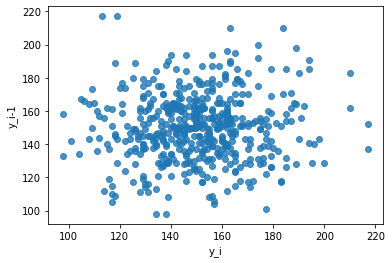

In [159]:
lag = testdata.copy()
lag = np.array(lag[:-1])
current = testdata[1:]
ax = sns.regplot(current,lag,fit_reg=False)
ax.set_ylabel("y_i-1")
ax.set_xlabel("y_i")

<AxesSubplot:>

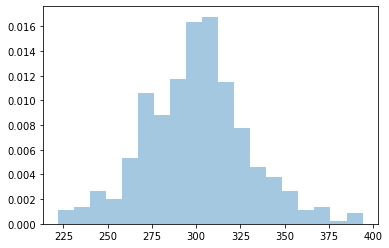

In [161]:
connected = np.array([testdata[i]+testdata[i-1] for i in np.arange(500)])
sns.distplot(connected,kde=False,norm_hist=True)

Text(0.5, 0, 'y_i')

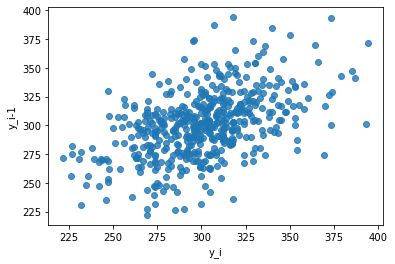

In [162]:
lag = connected.copy()
lag = np.array(lag[:-1])
current = connected[1:]
ax = sns.regplot(current,lag,fit_reg=False)
ax.set_ylabel("y_i-1")
ax.set_xlabel("y_i")

## QQ Plot
* QQ Plots takes our n ordered data points
 * sorted from smallest to largest
* Asks:
 * What is the relationship between quantiles from our data and quantiles from a theoretical distribution that we're assuming the sample is drawn from

In [163]:
from scipy import stats

<AxesSubplot:>

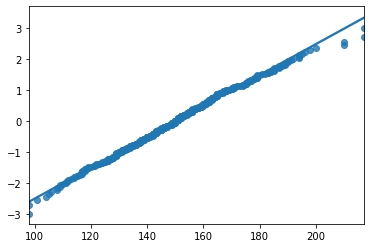

In [164]:
qntls, xr = stats.probplot(testdata, fit=False)
sns.regplot(xr,qntls)

In [165]:
def random_snorm(n, mean = 0, sd = 1, xi = 1.5):
    def random_snorm_aux(n, xi):
        weight = xi/(xi + 1/xi)
        z = np.random.uniform(-weight,1-weight,n)
        xi_ = xi**np.sign(z)
        random = -np.absolute(np.random.normal(0,1,n))/xi_ * np.sign(z)
        m1 = 2/np.sqrt(2 * np.pi)
        mu = m1 * (xi - 1/xi)
        sigma = np.sqrt((1 - m1**2) * (xi**2 + 1/xi**2) + 2 * m1**2 - 1)
        return (random - mu)/sigma

    return random_snorm_aux(n, xi) * sd + mean


<AxesSubplot:ylabel='Count'>

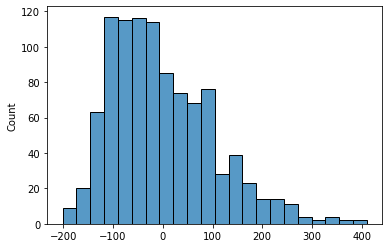

In [166]:
rightskewed = random_snorm(1000,xi=2)*100
sns.histplot(rightskewed,kde=False)

<AxesSubplot:>

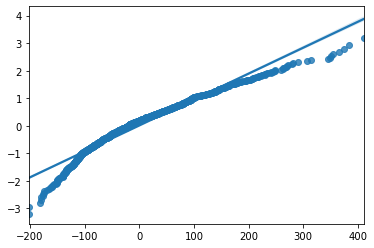

In [167]:
qntls, xr = stats.probplot(rightskewed, fit=False)
sns.regplot(x=xr,y=qntls)

<AxesSubplot:ylabel='Count'>

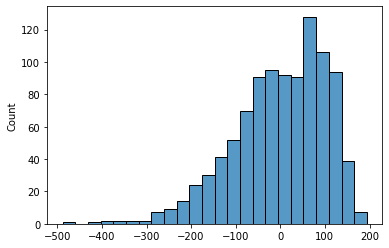

In [168]:
leftskewed = random_snorm(1000,xi=-2)*100
sns.histplot(leftskewed,kde=False)

<AxesSubplot:>

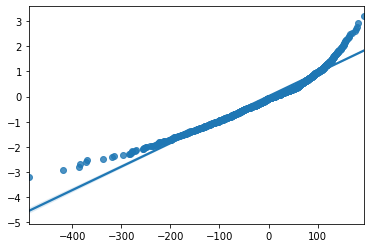

In [169]:
qntls, xr = stats.probplot(leftskewed, fit=False)
sns.regplot(x=xr,y=qntls)

## Now the serious plots... let's wrap them in a single function that we can call

In [170]:
def multiplePlots( series ):
    
    fig, axs = plt.subplots(2,2)
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=1.0)

    # Histogram
    sns.histplot(series, ax=axs[0,0])
    
    # Lag plot
    lag = series.copy()
    lag = np.array(lag[:-1])
    current = series[1:]
    ax = sns.regplot(x=current,y=lag,fit_reg=False, ax=axs[0,1])
    ax.set_ylabel("y_i-1")
    ax.set_xlabel("y_i")
    
    # QQ plot
    qntls, xr = stats.probplot(series, fit=False)
    sns.regplot(x=xr,y=qntls, ax=axs[1,0])
    
    # Run sequence
    ax = sns.regplot(x=np.arange(len(series)),y=series, ax=axs[1,1])
    ax.set_ylabel("val")
    ax.set_xlabel("i")


## Now run this on your "things"

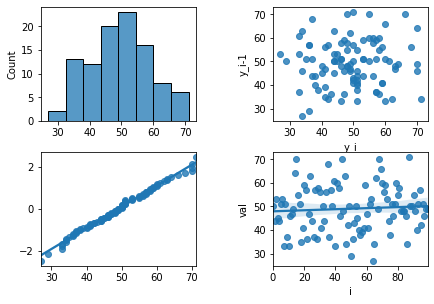

In [171]:
multiplePlots(things)

### <font color="magenta">Q13: <a href="https://www.theguardian.com/news/datablog/2010/jul/16/data-plural-singular">Do your data look</a> normally distributed?</font>
Explain why or why not.

### <font color="magenta">Q14: </font>
The sample.csv file, available from https://raw.githubusercontent.com/umsi-data-science/data/main/sample.csv, contains 9 variables (v0 through v9) that contain measures drawn from different distributions.
Your task is to use the investigative techniques we discussed in today's lab to determine
what type of distribution the sample is drawn from.

You should first load the CSV file into a DataFrame, then look at various aspects of **each** variable.

**Your responses should consist of code cells, as well as markdown cells that state something like:**
> Variable vXX appears to be drawn from a uniform distribution with mean X and standard deviation Y.  
> A histogram of the data appears to be...
> The QQ plot shows.... 


In [172]:
data = pd.read_csv("https://raw.githubusercontent.com/umsi-data-science/data/main/sample.csv")

In [173]:
data.head()

,Unnamed: 0,v0,v1,v2,v3,v4,v5,v6,v7,v8
0,0,1.631199,-91.334068,136.366596,16,20,0,134,-12.839137,137.0
1,1,0.170943,19.576805,-168.173019,1,8,4,164,-17.844388,154.2
2,2,0.700463,48.971743,105.114103,1,1,5,114,-18.350073,156.4
3,3,-0.649827,-64.727316,95.736505,1,36,1,113,-13.069634,157.6
4,4,-0.981346,-48.597671,97.515633,1,58,3,151,-21.646358,148.8


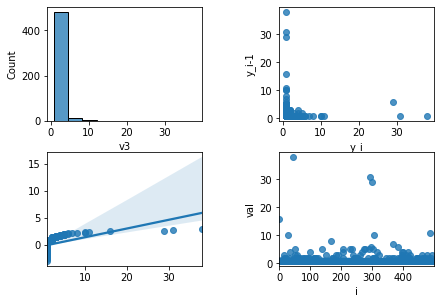

In [177]:
multiplePlots(data['v3'])

# <font color="red">NOTE: DO NOT RESUBMIT THIS NOTEBOOK!</font>